In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix,classification_report


In [71]:
# Download latest version
path = kagglehub.dataset_download("govindaramsriram/energy-consumption-dataset-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\govindaramsriram\energy-consumption-dataset-linear-regression\versions\1


In [72]:
import glob
import os
# جلب أول ملف .txt تلقائيًا
data_path = glob.glob(os.path.join(path, "*.csv"))[0]

df = pd.read_csv(data_path)
df


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


# This problem that  we will predict the Energy Consumption 

## now  i will statrt EDA to prepare data

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [74]:
df['Building Type'].unique()

array(['Residential', 'Commercial', 'Industrial'], dtype=object)

In [75]:
tobar=df['Building Type'].value_counts()

In [76]:
tobar.index

Index(['Residential', 'Industrial', 'Commercial'], dtype='object', name='Building Type')

<BarContainer object of 3 artists>

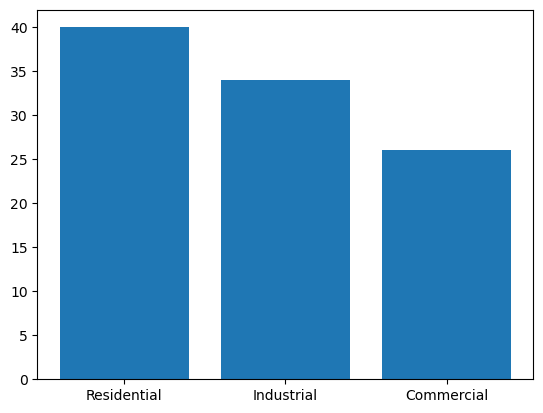

In [77]:
plt.bar(tobar.index,tobar.values)

In [78]:
# the statisics describe
print(f'The mean is : {df['Square Footage'].mean()}')
print(f'The mean is : {df['Square Footage'].median()}')

The mean is : 25881.92
The mean is : 27582.5


In [79]:
# then we have not outlier with data

### another way to know outlier using descripe()

In [80]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


{'whiskers': [<matplotlib.lines.Line2D at 0x1c2b85b9040>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2b85b9640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2b85b8da0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2b85b9ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2b85b9e20>],
 'means': []}

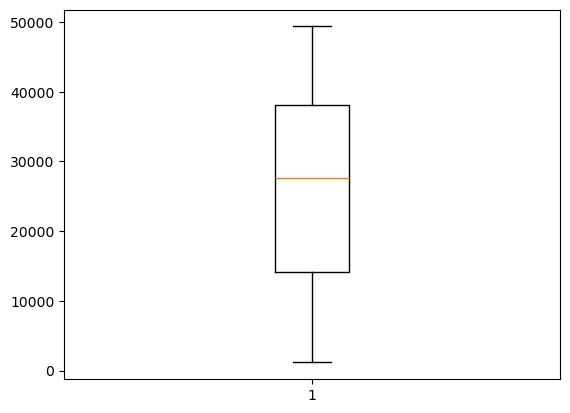

In [81]:
plt.boxplot(df['Square Footage'])

In [82]:
correlation=df.corr(numeric_only=True)['Energy Consumption'].sort_values(ascending=False)

In [83]:
correlation

Energy Consumption     1.000000
Square Footage         0.724039
Number of Occupants    0.308594
Appliances Used        0.176380
Average Temperature   -0.079733
Name: Energy Consumption, dtype: float64

## the most influence in Energy is Square Footage

In [84]:
dfsimple=df[['Square Footage','Energy Consumption']]

In [85]:
dfsimple

,Square Footage,Energy Consumption
0,24563,2865.57
1,27583,4283.80
2,45313,5067.83
3,41625,4624.30
4,36720,4820.59
...,...,...
95,1161,3010.81
96,37943,4248.49
97,1558,2843.60
98,2145,3348.39


In [86]:
x=dfsimple.iloc[:,:-1].values
y=dfsimple.iloc[:,-1].values

In [87]:
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)

In [88]:
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

In [89]:
smodel=LinearRegression()

In [90]:
smodel.fit(x_train_scaled,y_train)

LinearRegression()

In [91]:
y_pred = smodel.predict(x_test_scaled)

In [92]:
def plot_results(x,y):
    plt.scatter(x, y, color = 'red')
    plt.plot(x,smodel.predict(x), color = 'blue')
    plt.title(f'Energy Consumption = {round(smodel.intercept_,2)} + {np.round(smodel.coef_[0],2)} Square Footage')
    plt.xlabel('Square Footage')
    plt.ylabel('Energy Consumption')
    plt.show()

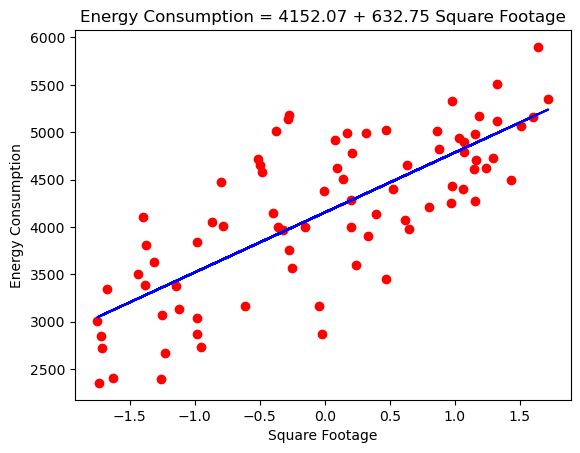

In [93]:
plot_results(x_train_scaled, y_train)

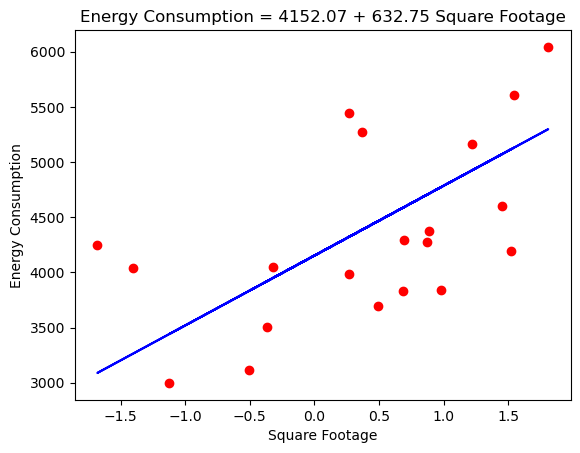

In [94]:
plot_results(x_test_scaled, y_test)

In [95]:
df_multiple = df[['Square Footage', 'Number of Occupants', 'Appliances Used', 'Energy Consumption']]

In [96]:
df_multiple

,Square Footage,Number of Occupants,Appliances Used,Energy Consumption
0,24563,15,4,2865.57
1,27583,56,23,4283.80
2,45313,4,44,5067.83
3,41625,84,17,4624.30
4,36720,58,47,4820.59
...,...,...,...,...
95,1161,81,11,3010.81
96,37943,50,23,4248.49
97,1558,27,29,2843.60
98,2145,56,12,3348.39


In [97]:
X_multiple = df_multiple.iloc[:, :-1].values 
y_multiple = df_multiple.iloc[:, -1].values

In [98]:
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

In [99]:
scaler_multiple = StandardScaler()
X_train_multiple_scaled = scaler_multiple.fit_transform(X_train_multiple)
X_test_multiple_scaled = scaler_multiple.transform(X_test_multiple)

In [100]:
model_multiple = LinearRegression()
model_multiple.fit(X_train_multiple_scaled, y_train_multiple)

LinearRegression()

In [101]:
y_pred_multiple = model_multiple.predict(X_test_multiple_scaled)

In [102]:
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test_multiple, y_pred_multiple)
r2 = r2_score(y_test_multiple, y_pred_multiple)

print("Coefficients:", model_multiple.coef_)
print("Intercept:", model_multiple.intercept_)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Coefficients: [627.65922831 327.33030464 248.72058184]
Intercept: 4151.752375
Mean Squared Error (MSE): 205473.76642798647
R2 Score: 0.6919300451266858


In [103]:
feature_names = ['Square Footage', 'Number of Occupants', 'Appliances Used']
print("\nFeature Importance:")
for i in range(len(feature_names)):
    print(f"{feature_names[i]}: {model_multiple.coef_[i]:.4f}")


Feature Importance:
Square Footage: 627.6592
Number of Occupants: 327.3303
Appliances Used: 248.7206


In [104]:
X_data=df[['Square Footage', 'Number of Occupants', 'Appliances Used']]
y_data=df['Energy Consumption']

In [105]:
x_train_pol,x_test_pol,y_train_pol,y_test_pol=train_test_split(X_data,y_data,test_size=0.2,random_state=1)

In [106]:
scaler_pol=StandardScaler()
x_train_pol_scaled=scaler_pol.fit_transform(x_train_pol)
x_test_pol_scaled=scaler_pol.transform(x_test_pol)

In [107]:
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train_pol_scaled)
x_test_poly=poly.transform(x_test_pol_scaled)


In [108]:
lin_model=LinearRegression()
lin_model.fit(x_train_poly,y_train_pol)

LinearRegression()

In [109]:
y_pred_pol=lin_model.predict(x_test_poly)

In [110]:
r2=r2_score(y_test_pol,y_pred_pol)
mse=mean_squared_error(y_test_pol,y_pred_pol)

print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)

R2 Score: 0.6474833198932866
Mean Squared Error (MSE): 222342.95365649267


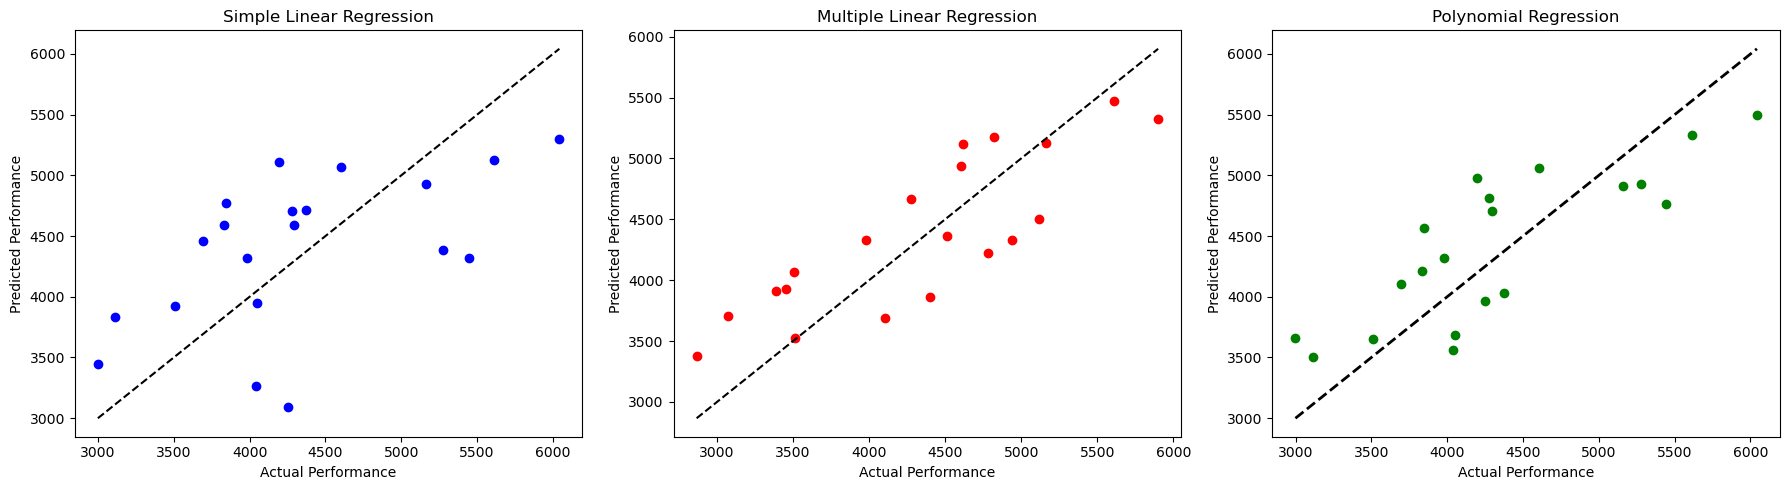

In [119]:

plt.figure(figsize=(18, 5))  
# 1. Simple regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual Performance')
plt.ylabel('Predicted Performance')
plt.title('Simple Linear Regression')

# 2. Multiple regression
plt.subplot(1, 3, 2)
plt.scatter(y_test_multiple, y_pred_multiple, color='red')
plt.plot([y_test_multiple.min(), y_test_multiple.max()], [y_test_multiple.min(), y_test_multiple.max()], 'k--')
plt.xlabel('Actual Performance')
plt.ylabel('Predicted Performance')
plt.title('Multiple Linear Regression')

# 3. Polynomial regression
plt.subplot(1, 3, 3)
plt.scatter(y_test_pol, y_pred_pol, color='green')
plt.plot([y_test_pol.min(), y_test_pol.max()],
         [y_test_pol.min(), y_test_pol.max()],
         'k--', lw=2)
plt.xlabel('Actual Performance')
plt.ylabel('Predicted Performance')
plt.title('Polynomial Regression')

plt.tight_layout()
plt.show()
